In [1]:
import os
import urllib #웹에서 데이터를 다운로드할 때 사용
import cv2 #openCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation #시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

# 이미지 불러오기

(1390, 1062, 3)


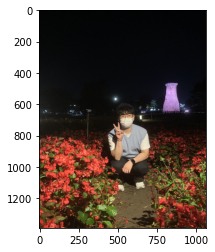

(1406, 1058, 3)


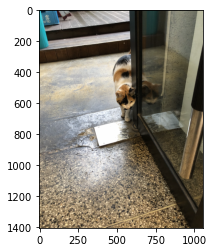

(1390, 1062, 3)


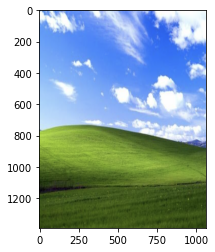

In [2]:
'''
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()
'''

# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img.png'  
img_orig = cv2.imread(img_path) 



print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
cat_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.png'  
cat_orig = cv2.imread(cat_path) 


print(cat_orig.shape)
plt.imshow(cv2.cvtColor(cat_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
window_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/window.png'  
window_orig = cv2.imread(window_path) 
window_orig = cv2.resize(window_orig,(1062,1390))

print(window_orig.shape)
plt.imshow(cv2.cvtColor(window_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 모델 불러오기

In [3]:

# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb32cd57d30>)

# 모델 생성

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output= model.segmentAsPascalvoc(img_path)

In [6]:
segvalues_1, output_1 = model.segmentAsPascalvoc(cat_path)

In [7]:
#PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

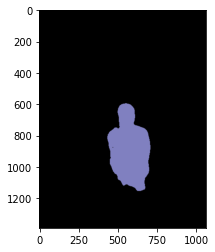

In [8]:
plt.imshow(output)
plt.show()

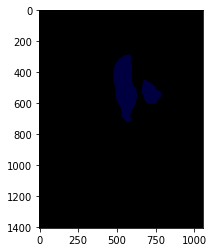

In [9]:
plt.imshow(output_1)
plt.show()

In [10]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
segvalues_1

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [12]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [13]:
for class_id_1 in segvalues_1['class_ids']:
    print(LABEL_NAMES[class_id_1])

background
cat


In [14]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [15]:
colormap[15] #output = (B,G,R)

array([192, 128, 128])

In [16]:
seg_color = (128,128,192) #(R,G,B)로 바꿔줌

(1390, 1062)


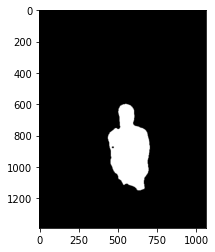

In [17]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [18]:
colormap[8] #output = (B,G,R)

array([64,  0,  0])

In [19]:
seg_color_1 = (0,0,64) #(R,G,B)로 바꿔줌

(1406, 1058)


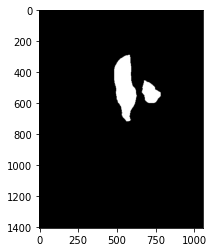

In [20]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map_1 = np.all(output_1==seg_color_1, axis=-1)
print(seg_map_1.shape)
plt.imshow(seg_map_1, cmap='gray')
plt.show()

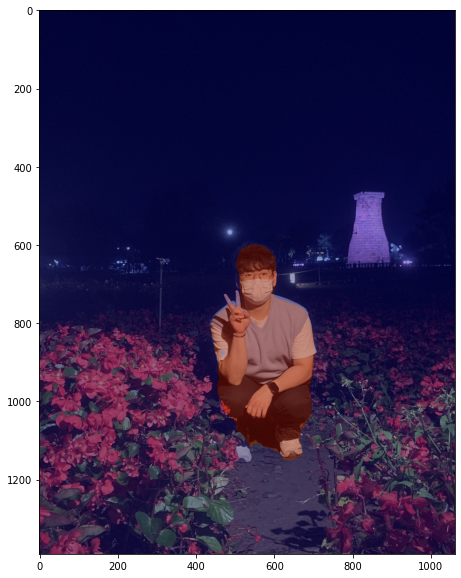

In [21]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

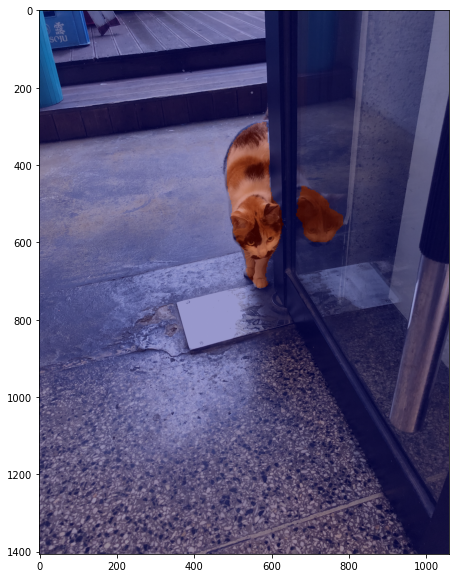

In [22]:
cat_show = cat_orig.copy()
#cat_show = cv2.resize(cat_show,(1062,1390))
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
cat_mask = seg_map_1.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_1 = cv2.applyColorMap(cat_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
cat_show = cv2.addWeighted(cat_show, 0.6, color_mask_1, 0.4, 0.0)

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(cat_show, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 흐리게 하기

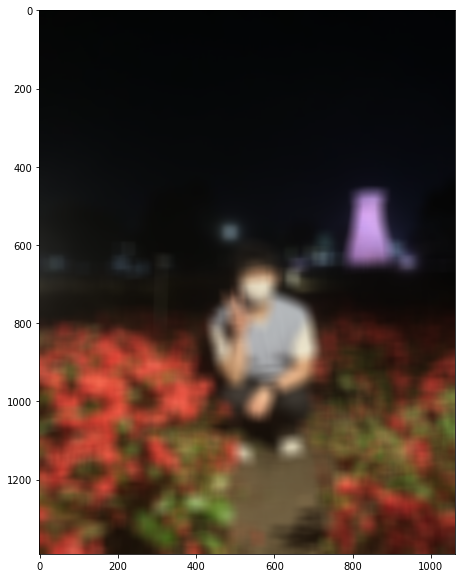

In [23]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (36,36))  # blur = 사진을 흐리게 한다
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

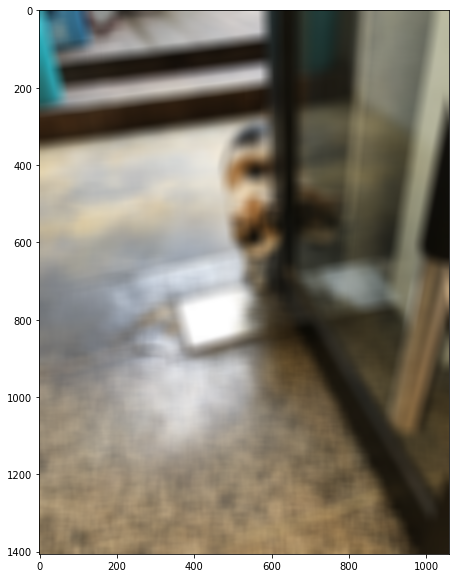

In [24]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
cat_orig_blur = cv2.blur(cat_orig, (36,36))  # blur = 사진을 흐리게 한다
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(cat_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

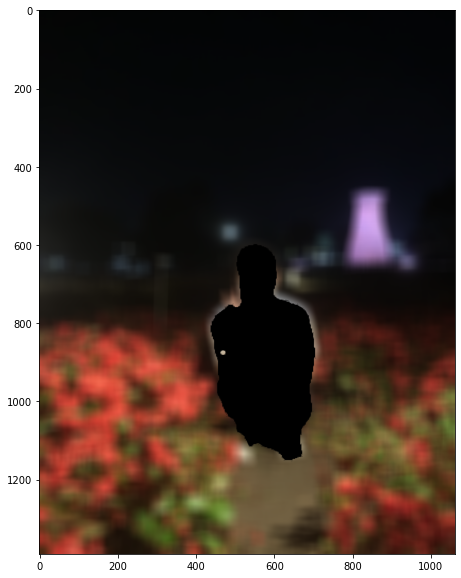

In [25]:
#사진에서 배경을 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

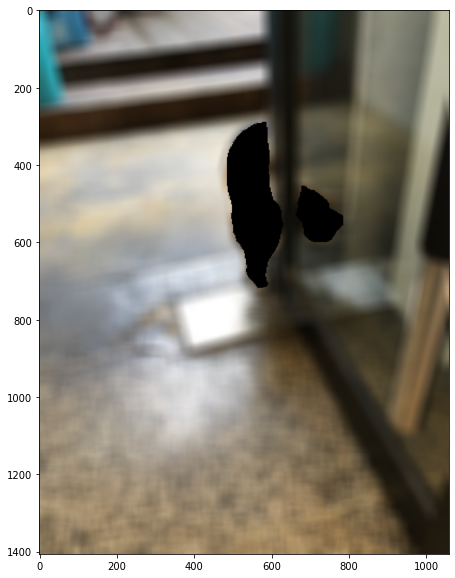

In [26]:
#사진에서 배경을 추출
cat_mask_color = cv2.cvtColor(cat_mask, cv2.COLOR_GRAY2BGR)
cat_bg_mask = cv2.bitwise_not(cat_mask_color)
cat_bg_blur = cv2.bitwise_and(cat_orig_blur, cat_bg_mask)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(cat_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 인물모드 출력

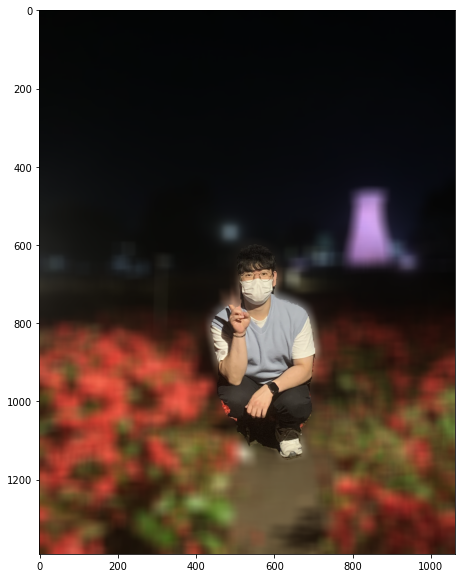

In [27]:
img_concat = np.where(img_mask_color==255, img_orig,img_bg_blur )
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

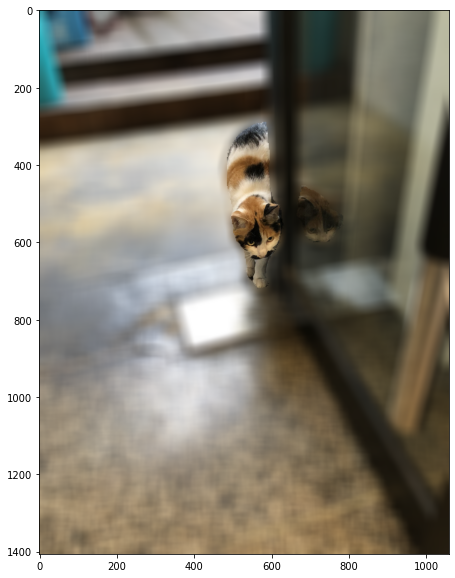

In [28]:
cat_concat = np.where(cat_mask_color==255, cat_orig,cat_bg_blur )
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(cat_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 바꿔보기

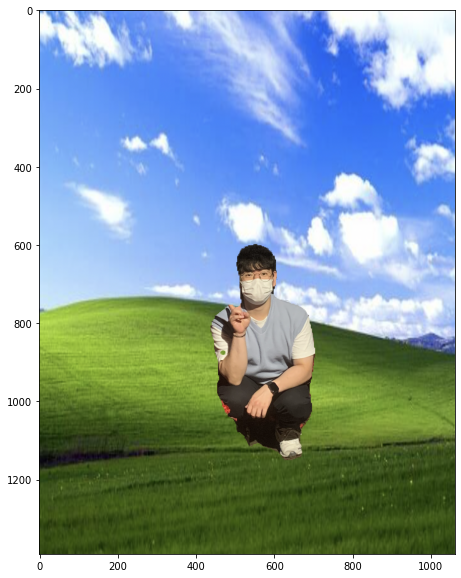

In [29]:
img_concat = np.where(img_mask_color==255, img_orig, window_orig)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

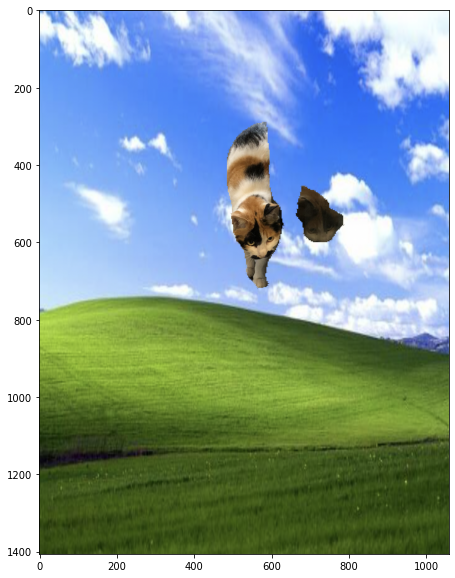

In [30]:
window_orig_1 = cv2.resize(window_orig,(1058,1406))

cat_concat = np.where(cat_mask_color==255, cat_orig, window_orig_1)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(cat_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

처음 내 사진에서는 V한 손가락을 인식하지 못하거나 꽃에 가려진 발 부분은 인식을 못하는 문제가 있었고,

사람만 자르는 부분에서 경계선이 정확하지는 않은지 뒤에 꽃도 약간 포함되는 부분이 있었다.

모델이 아주 세밀하게 인물만 따로 빼는게 아니라고 생각해서 고양이 사진엔

고양이가 유리에 비춰진 부분을 흐리게 만들 수 있을거라고 생각해서 가지고 와서 써봤다.

내 생각과는 다르게 유리에 비춰진 모습까지 고양이로 인식해서

크로마키로 사용한 부분에 고양이가 이상하게 나왔다,,,

역시 마음대로 쉽게 되는건 없는 것 같다 ㅠㅠ

